In [1]:
#7. Численно промоделировать полет тела.
#• Рассчитайте траекторию тела, летящего в поле тяжести по параболе.
#• Отобразите траекторию на графике.
#• Решите эту же задачу аналитически (sympy), сравните результат.
#• Повторите тот же анализ, добавив модель трения о воздух. Оптимизируйте угол
#   вылета тела (при заданном модуле начальной скорости) так, чтобы пересечение уровня
#   начальной высоты произошло как можно дальше от начальной точки.

from scipy.integrate import ode
import matplotlib.pyplot as plt
import numpy as np
import math

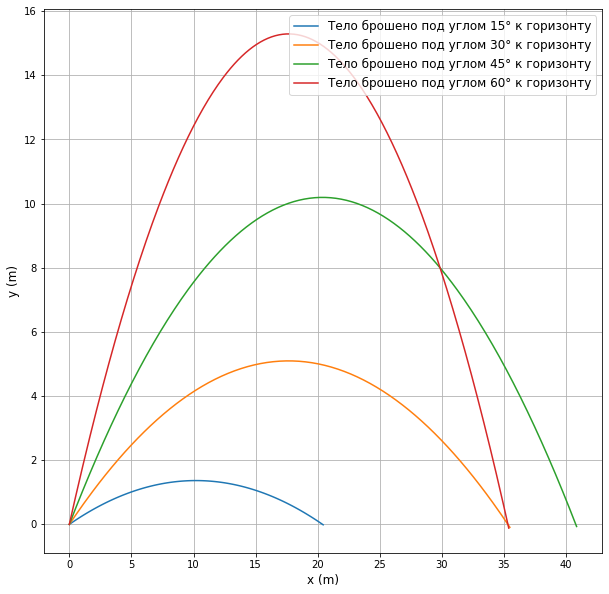

In [3]:
#• Рассчитайте траекторию тела, летящего в поле тяжести по параболе.
    #  |r>"= - m|g>
    #~{ mx" = 0
    # { my" = -mg
    #Надо свести это к ДУ первой степени (только так их может решать ode):
    # заменим x = x1, x' = x2 => x1' = x2, x2' = 0
    # аналогично y = y1, y' = y2 => y1' = y2, y2' = -g
    # x1(0) = 0, x2(0) = v0cos(a)
    # y1(0) = 0, y2(0) = v0sin(a)

#• Отобразите траекторию на графике.
    #Нарисовал для разных углов начальных, чтоб было красиво

fig = plt.figure(figsize = (10, 10))
sub = fig.add_subplot(111)    
    
v0 = 20 #(m/s)
A = [np.pi/12, np.pi/6, np.pi/4, np.pi/3] #(rad)

tn = []
zn = []
tmax = 5

def fout(t, z): # функция, отвечающая за обработку шага
    tn.append(t)
    zn.append(list(z.copy()))
    if z[2] < 0 or t >= tmax:
        return -1

def f(t,z):
    g = 9.81
    x1, x2, y1, y2 = z
    return [x2, 0, y2, -g]

for a in A:
    ODE = ode(f) # ссылка на обьект ОДУ
    w = ODE.set_integrator('dopri5', max_step = 0.01) # описываем тип решения

    w.set_solout(fout)
    z0 = [0, v0*np.cos(a), 0, v0*np.sin(a)]
    w = ODE.set_initial_value(z0, t = 0.0)

    wt = w.integrate(tmax)
    Z = np.array(zn)
    zn.clear()
    
    plt.plot(Z[:,0], Z[:,2], label = f'Тело брошено под углом {round(math.degrees(a))}° к горизонту')

sub.set_xlabel('x (m)', fontsize = 12)
sub.set_ylabel('y (m)', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid(True)

x(t) = t⋅v₀cos(a)
            2             
         g⋅t              
y(t) = - ──── + t⋅v₀sin(a)
          2               


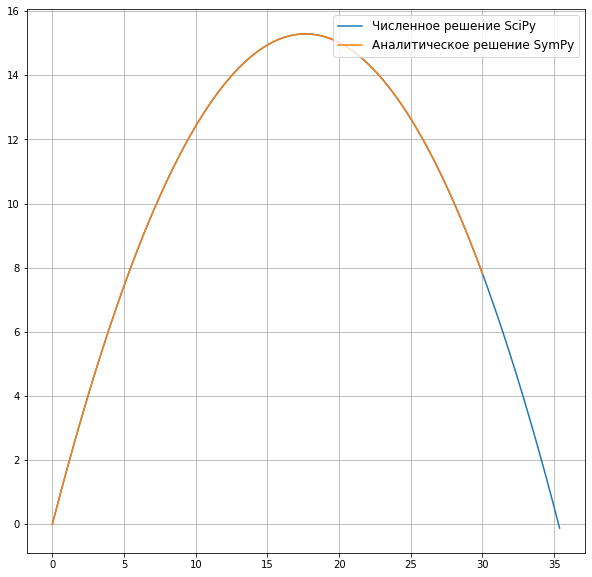

In [4]:
#• Решите эту же задачу аналитически (sympy), сравните результат.
    # Систему разом не получилось бабахнуть, жаль конечно, но так все-равно получилось

from sympy import *

#получим красивые аналитические формулы
t = Symbol('t')
g = Symbol('g')
v0sina = Symbol('v₀sin(a)')
v0cosa = Symbol('v₀cos(a)')


x, y = symbols(names = ('x', 'y'), cls = Function)

eqOx  = Eq(x(t).diff(t,2), 0)
eqOy = Eq(y(t).diff(t,2), -g)


solx = dsolve(eqOx) #, x0 = 0, ics = {x(0): 0}) #Derivative(x(0),t): v0*np.cos(A[1])})
                    #победа: type(solx) = sympy.core.relational.Equality, поэтому
                    #так: diff(3*t + t**2, t) - он считает, а от моей функции не хочет
                    #но! можно взять производную отдельно от правой части:)
        
Cx = solve([Eq(0, solx.rhs.subs(t,0)), Eq(v0cosa, solx.rhs.diff(t).subs(t,0))]) #consty = solve([solx.subs(t,0)]) - одну константу поймали
solx = solx.subs(Cx)                                                            #soly.rhs.diff(t).subs(t,0) - так мы можем прямо значение подставить правла только в правую част (rhs)
                                                                                #Eq(Vx(t), soly.rhs.diff(t)) - так мы приравняем две половинки
soly = dsolve(eqOy)
Cy = solve([Eq(0, soly.rhs.subs(t,0)), Eq(v0sina, soly.rhs.diff(t).subs(t,0))])
soly = soly.subs(Cy)

pprint(solx)
pprint(soly)

#теперь нужно заменить буквы на цифры и составить массивы для рисования
v0 = 20 #(m/s)
a = np.pi/3

solx = solx.subs(g, 9.81).subs(v0cosa, v0*np.cos(a))
soly = soly.subs(g, 9.81).subs(v0sina, v0*np.sin(a))

ts = np.linspace(0, 3, 101) #(s) 
xs = [solx.subs(t, i).rhs for i in ts] #дописал .rhs, чтоб брать правые части только, иначе он составляет список Eq()
ys = [soly.subs(t, i).rhs for i in ts]

#сравнивать результат будем по картинке
fig = plt.figure(figsize= (10, 10))
sub = fig.add_subplot(111) #label = f'Тела брошены под углом {round(math.degrees(a))}° к горизонту') 

plt.plot(Z[:,0], Z[:,2], label = 'Численное решение SciPy') #последнее что лежит в Z[:,0] - бросок под 60 градусов, его и используем
plt.plot(xs, ys, label = 'Аналитическое решение SymPy')

plt.legend(loc = 'upper right', fontsize = 12)
plt.grid(True)

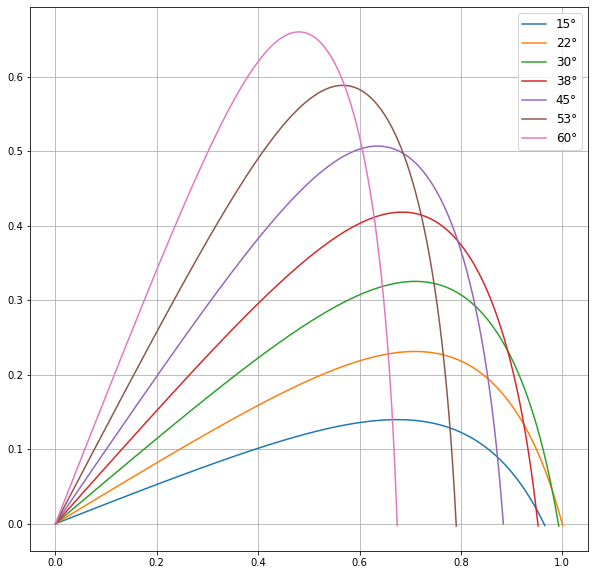

In [5]:
#• Повторите тот же анализ, добавив модель трения о воздух. Оптимизируйте угол
#  вылета тела (при заданном модуле начальной скорости) так, чтобы пересечение уровня
#  начальной высоты произошло как можно дальше от начальной точки.
    #  |r>"= - m|g> - γm|v>*v
    #~{ mx" = -γmx'*sqrt(x'**2 + y'**2)
    # { my" = -mg -γmy'*sqrt(x'**2 + y'**2)
    #Надо свести это к ДУ первой степени (только так их может решать ode):
    # заменим x = x1, x' = x2 => x1' = x2, x2' = 0
    # аналогично y = y1, y' = y2 => y1' = y2, y2' = -g
    # x1(0) = 0, x2(0) = v0cos(a)
    # y1(0) = 0, y2(0) = v0sin(a)

from scipy.integrate import ode #почему-то я могу только один раз после вызова попользоваться функцией
    
fig = plt.figure(figsize= (10, 10))
sub = fig.add_subplot(111)    
    
γ = 3 #(s)
v0 = 20 #(m/s)
A = np.arange(np.pi/12, np.pi/3 + np.pi/24 - 0.1, np.pi/24) #(rad)

tn = []
zn = []
tmax = 5

def fout(t, z): # функция, отвечающая за обработку шага
    tn.append(t)
    zn.append(list(z.copy()))
    if z[2] < 0 or t >= tmax:
        return -1

def f(t,z):
    g = 9.81
    x1, x2, y1, y2 = z
    return [x2, -γ*x2*np.sqrt(x2**2 + y2**2), y2, -g -γ*y2*np.sqrt(x2**2 + y2**2)]

for a in A:
    ODE = ode(f) # ссылка на обьект ОДУ
    w = ODE.set_integrator('dopri5', max_step = 0.002) # описываем тип решения; если тут сделать слишком маленький шаг, он может на вас пожаловаться

    w.set_solout(fout)
    z0 = [0, v0*np.cos(a), 0, v0*np.sin(a)]
    w = ODE.set_initial_value(z0, t = 0.0)

    wt = w.integrate(tmax)
    Z= np.array(zn)
    zn.clear()
    
    plt.plot(Z[:,0], Z[:,2], label = f'{round(math.degrees(a))}°')

plt.legend(loc = 'upper right', fontsize = 12)
plt.grid(True)

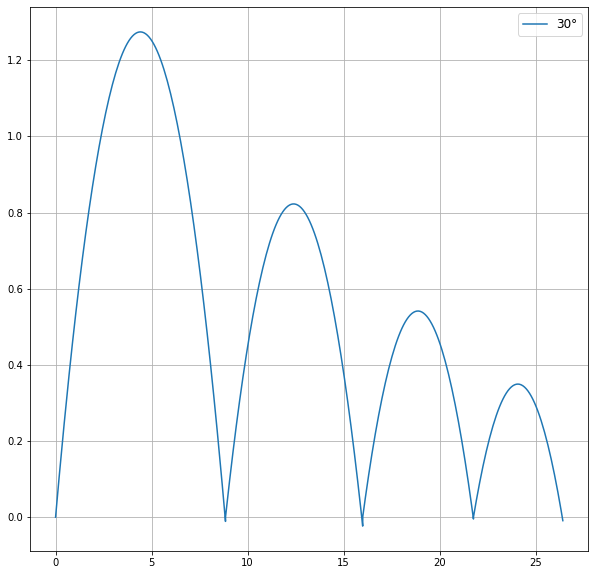

In [10]:
#можно закрафтить экстра типс: отскок от пола к этому ещё и ветерок, и анимацию

from scipy.integrate import ode #почему-то я могу только один раз после вызова попользоваться функцией
    
fig = plt.figure(figsize= (10, 10))
sub = fig.add_subplot(111)    
    
γ = 0 #(s) - коэффициент трения о воздух
δ = 0.8 # - коэффициент затухания при отскоке
v0 = 10 #(m/s)
a = np.pi/6

tn = []
zn = []
tmax = 15

def fout(t, z): # функция, отвечающая за обработку шага
    tn.append(t)
    zn.append(list(z.copy()))
    if z[2] < 0 or t >= tmax:
        return -1

def f(t,z):
    g = 9.81
    x1, x2, y1, y2 = z
    return [x2, -γ*x2*np.sqrt(x2**2 + y2**2), y2, -g -γ*y2*np.sqrt(x2**2 + y2**2)]

ODE = ode(f) # ссылка на обьект ОДУ
w = ODE.set_integrator('dopri5', max_step = 0.01) # описываем тип решения; если тут сделать слишком маленький шаг, он может на вас пожаловаться
w.set_solout(fout)

z0 = [0, v0*np.cos(a), 0, v0*np.sin(a)]
w = ODE.set_initial_value(z0, t = 0.0)
wt = w.integrate(tmax)

for i in range(3):
    z0 = [zn[-1][0], zn[-1][1], 0, -δ*zn[-1][3]]
    tnew0 = tn[-1]
    w = ODE.set_initial_value(z0, t = tnew0)
    wt = w.integrate(tmax)
        
Z = np.array(zn)
plt.plot(Z[:,0], Z[:,2], label = f'{round(math.degrees(a))}°')
zn.clear()

plt.legend(loc = 'upper right', fontsize = 12)
plt.grid(True)

In [89]:
#•   На эвересте кидают шар в какую-то сторону с какой-то силой
#•  нужно найти куда она упадёт на земле

    #Откинем наработанные решения и применим известные соображения из физики
    # станем решать эту задачу в полярной системе координат, зная начальные условия:
    # ρ0 = 6378 + 8848
    # А так как за нас эту задачу уже решили нарисуем просто траекторию.
    # Ладно, сделаем уж хоть что-нибудь, чтоб не так грустно было
    #
    # E = mr'^2/2 + L^2/(2mr^2) - γ/r, γ = G*M*m
    # dφ/dr = L/( r^2*sqrt(2m[E - γ/r] - L^2/r^2) ) ну вот
    #
    # Я ебал лично что-то придумывать с тем, что оде может интегрировать только по времени
    
#fig = plt.figure(figsize = (10, 10))
#sub = fig.add_subplot(111, polar = True)    
    
#σ = 3 #(s)
v0 = 20 #(m/s)
α =  np.pi/6 #(rad)
G = 6.67* (10 ** (-11)) #(m3 kg-1 s-2)
M = 5.97* (10 ** 24) # (kg)
m = 2.9 # (kg) - масса пушечного ядра для ствола 96мм
R = 6378* (10 ** 2) #(m)
ρ0 = R + 8848 #(m)

γ = G*M*m #(J*m)
L = ρ0*m*v0*np.cos(α) #(m2 kg s-1)
E = m*(v0*np.sin(α)**2)/2 + (L**2)/2*m*(ρ0**2) - γ/ρ0 #(J)

p = L**2/(m*γ)
e = np.sqrt(1 + 2*E*(L**2)/(m*(γ**2)))


207

-0.15321050263599253


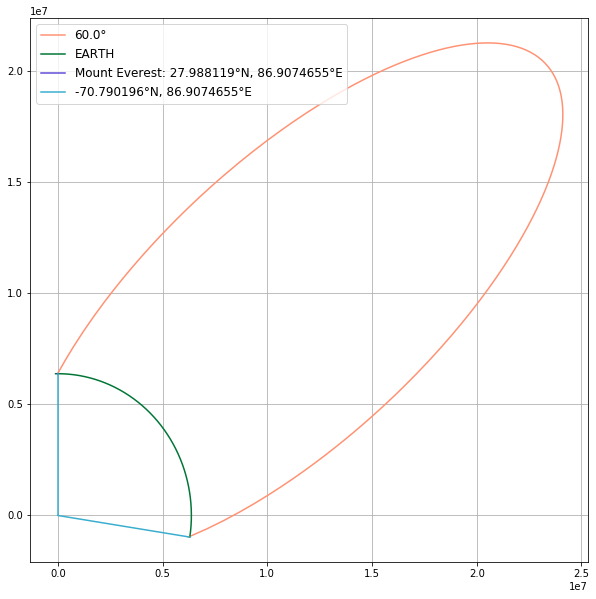

In [10]:
fig = plt.figure(figsize = (10, 10))
sub = fig.add_subplot(111)    
    
k = 10**(-5)
k = 0
v0 = 10**4 #(m/s)
a = 60 #(degrees)
a = math.radians(a) #(rad)
G = 6.67* (10 ** (-11)) #(m3 kg-1 s-2)
M = 5.97* (10 ** 24) # (kg)
m = 2.9 # (kg) - масса пушечного ядра для ствола 96мм
R = 6378* (10 ** 3) #(m)
r0 = R + 8848 #(m)

g = G*M #(J m kg-1)

tn = []
zn = []
tmax = 10**100 # передо мной ситуация, где по-моему из-за этой штуки я не могу всю дорогу нарисовать, а дальше он не дабл

def fout(t, z): # функция, отвечающая за обработку шага
    tn.append(t)
    zn.append(list(z.copy()))
    
    #print(z[0])
    
    if z[0]**2 + z[2]**2 < R**2 or t >= tmax: #z[0]/R > 0.8 or это условие для слабаков, сильные подбирают макс_степ
        return -1

def f(t,z):
    x1, x2, y1, y2 = z
    return [x2, -g*x1/np.sqrt((x1**2 + y1**2)**3) -k*x2*np.sqrt(x2**2 + y2**2), y2, -g*y1/np.sqrt((x1**2 + y1**2)**3) -k*y2*np.sqrt(x2**2 + y2**2)]

ODE = ode(f) # ссылка на обьект ОДУ
w = ODE.set_integrator('dopri5', max_step = 10**2) # описываем тип решения #возникает основная проблема в определении параметра max_step

w.set_solout(fout)
z0 = [0, v0*np.cos(a), r0, v0*np.sin(a)]
w = ODE.set_initial_value(z0, t = 0.0)

wt = w.integrate(tmax)
Z = np.array(zn)
print(f'\n{len(Z[:,2])}')

b = np.arcsin(Z[-1][2]/R) #if Z[-1][0] > 0 :
#else: b = np.arcsin(Z[-1][2]/R)
print(f'\n{b}')

plt.plot(Z[:,0], Z[:,2], label = f'{round(math.degrees(a), 3)}°', color = '#FF9273')
plt.plot([R*np.cos(t) for t in np.arange(b*0.996, np.pi/2*1.014, 0.01)], [R*np.sin(t) for t in np.arange(b*0.996, np.pi/2*1.014, 0.01)], color = '#007536', label = 'EARTH')
plt.plot([-R*np.cos(np.pi/2*1.0007), 0, R*np.cos(np.pi/2*1.0007)], [R*np.sin(np.pi/2*1.0007), r0, R*np.sin(np.pi/2*1.0007)], color = '#5E4BD8', label = 'Mount Everest: 27.988119°N, 86.9074655°E')
plt.plot([0, R*np.cos(b)], [0, R*np.sin(b)], color = '#39AECF', label = f'{round(27.988119 - math.degrees(np.pi/2 - b), 6)}°N, 86.9074655°E')
plt.plot([0,0], [0,R], color = '#39AECF')
#plt.plot([-R*np.cos(np.pi/2*1.01), 0, R*np.cos(np.pi/2*1.01)], [r0, r0, r0 + r0*np.sin(a)])

#sub.set_xlabel('x (m)', fontsize = 12)
#sub.set_ylabel('y (m)', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 12)
plt.grid(True)

In [292]:
Z[-1]

array([ 6.22749957e+06, -9.39492245e+03, -9.73358118e+05, -3.65951305e+03])

In [ ]:
-g*x1/np.sqrt((x1**2 + y1**2)**3)